# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: 

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [5]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete

X, y = load_concrete()

print(X.shape)
print(y.shape)

(1030, 8)
(1030,)


### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [6]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_validate

# Step 3: Implementing the nachine learning model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# creating the three regression models 
# other hyperparameters that need to be set are n_estimators,  max_features, and min_sample_leaf for random forests. 
# n_estimators generally larger the better
# for regression max_features = num of features = 8
# other hyperparameters for gradient boosting n_estimators and learning_rate
tree = DecisionTreeRegressor(max_depth=5).fit(X_train, y_train)
forest = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=0).fit(X_train, y_train)
gradiant = GradientBoostingRegressor(max_depth=5, n_estimators=100, learning_rate=0.1, random_state=0).fit(X_train, y_train)

#Step 4: Validate Model
# for decison tree
tree_scores= cross_validate(tree, X_train, y_train, scoring='neg_mean_squared_error', return_train_score=True)
mean_tree_train_scores = -tree_scores['train_score'].mean()
mean_tree_val_scores = -tree_scores['test_score'].mean()
print(mean_tree_train_scores)
print(mean_tree_val_scores)
# for random forest 
forest_scores= cross_validate(forest, X_train, y_train, scoring='neg_mean_squared_error', return_train_score=True)
mean_forest_train_scores = -forest_scores['train_score'].mean()
mean_forest_val_scores = -forest_scores['test_score'].mean()
# for gradiant boosting
gradiant_scores= cross_validate(gradiant, X_train, y_train, scoring='neg_mean_squared_error', return_train_score=True)
mean_gradiant_train_scores = -gradiant_scores['train_score'].mean()
mean_gradiant_val_scores = -gradiant_scores['test_score'].mean()

#Step 5: Visualizing results 
train_scores = [mean_tree_train_scores, mean_forest_train_scores, mean_gradiant_train_scores]
val_scores = [mean_tree_val_scores, mean_forest_val_scores,mean_gradiant_val_scores ]
results = pd.DataFrame(columns=["Training accuracy", "Validation accuracy"], index=['DT', 'RF', 'GB'])
results["Training accuracy"] = train_scores
results['Validation accuracy'] = val_scores
results


47.279760500220995
70.64381848799349


,Training accuracy,Validation accuracy
DT,47.279761,70.643818
RF,29.577455,45.059351
GB,3.379440,22.783221


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [7]:
#Step 4: Validate Model
tree_scores= cross_validate(tree, X_train, y_train, scoring='r2', return_train_score=True)
mean_tree_train_scores = tree_scores['train_score'].mean()
mean_tree_val_scores = tree_scores['test_score'].mean()

# for random forest 
forest_scores= cross_validate(forest, X_train, y_train, scoring='r2', return_train_score=True)
mean_forest_train_scores = forest_scores['train_score'].mean()
mean_forest_val_scores = forest_scores['test_score'].mean()
# for gradiant boosting
gradiant_scores= cross_validate(gradiant, X_train, y_train, scoring='r2', return_train_score=True)
mean_gradiant_train_scores = gradiant_scores['train_score'].mean()
mean_gradiant_val_scores = gradiant_scores['test_score'].mean()

#Step 5: Visualizing results 
train_scores = [mean_tree_train_scores, mean_forest_train_scores, mean_gradiant_train_scores]
val_scores = [mean_tree_val_scores, mean_forest_val_scores,mean_gradiant_val_scores ]

results = pd.DataFrame(columns=["Training accuracy", "Validation accuracy"], index=['DT', 'RF', 'GB'])
results["Training accuracy"] = train_scores
results['Validation accuracy'] = val_scores
results

,Training accuracy,Validation accuracy
DT,0.834465,0.750191
RF,0.896557,0.840927
GB,0.988171,0.919471


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

*ANSWER HERE*

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [8]:
# Loading wine data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
 
column_headers = [
    "Class",
    "Alcohol",
    "Malic Acid",
    "Ash",
    "Alcalinity of Ash",
    "Magnesium",
    "Total Phenols",
    "Flavanoids",
    "Nonflavanoid Phenols",
    "Proanthocyanins",
    "Color Intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline"
]

wine_data = pd.read_csv(url, names=column_headers)

# the Class column will be the target vector since we are using a classification model
# creating feature matrix and traget vector 
X = wine_data.drop('Class', axis=1)
y = wine_data['Class']


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [9]:
# TO DO: ADD YOUR CODE HERE
X.head()

,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [10]:
# there are no missing values no need to fill
X.isnull().sum()


Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of Ash               0
Magnesium                       0
Total Phenols                   0
Flavanoids                      0
Nonflavanoid Phenols            0
Proanthocyanins                 0
Color Intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

How many samples do we have of each type of wine?

In [11]:
# TO DO: ADD YOUR CODE HERE
print("There are " + str(X.shape[0]) + " samples in the wine data set.")


There are 178 samples in the wine data set.


### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [17]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

# Step 3: Machine learning model
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

tree = DecisionTreeClassifier(max_depth=3,random_state=0).fit(X_train, y_train)
svc = SVC().fit(X_train, y_train)

# Step 4: Validate the model
models = [tree, svc]

cross_val = [cross_validate(model, X_train, y_train, scoring='accuracy', return_train_score=True) for model in models]

mean_train = [cross['train_score'].mean() for cross in cross_val]
mean_val = [cross['test_score'].mean() for cross in cross_val]

# Step 5.1: Compare models
results = pd.DataFrame(columns=["Training accuracy", "Validation accuracy"], index=['Tree', 'SVC'])
results["Training accuracy"] = mean_train
results['Validation accuracy'] = mean_val
results

,Training accuracy,Validation accuracy
Tree,0.994357,0.894017
SVC,0.680427,0.676638


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [23]:
# TO DO: Implement best model
# decision tree classification produced the best results so the tree model will be used in the next steps

Text(72.72222222222221, 0.5, 'true value')

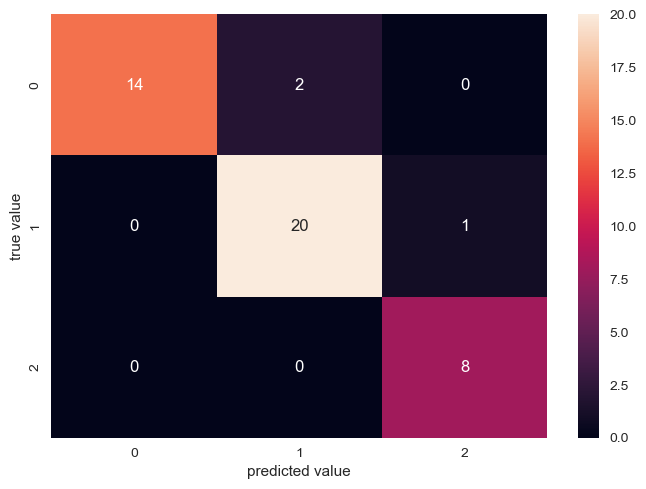

In [28]:
# TO DO: Print confusion matrix using a heatmap
from sklearn.metrics import confusion_matrix
y_wine_pred = tree.predict(X_test)
matrix = confusion_matrix(y_test, y_wine_pred)

sns.heatmap(matrix, annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [29]:
# TO DO: Print classification report
from sklearn.metrics import classification_report

report = classification_report(y_test, y_wine_pred)

print(report)

              precision    recall  f1-score   support

           1       1.00      0.88      0.93        16
           2       0.91      0.95      0.93        21
           3       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2? 
1. In this case, is maximizing precision or recall more important? Why?

*YOUR ANSWERS HERE*

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [ ]:
# TO DO: ADD YOUR CODE HERE

*ANSWER HERE*